# Asia, n.e.s/PLP trocas comerciais

A partir dos dados da base comtrade das Nações Unidas (see https://unstats.un.org/wiki/display/comtrade/Taiwan%2C+Province+of+China+Trade+data)

## Inicialização

Ver [aqui](0-comtrade-setup-first.ipynb) para instruções como obter chave de acesso APIKEY.
A APIKEY que dá acesso a mais de 500 linhas de
resultados.


In [1]:
import comtradetools as comtradetools

comtradetools.setup()
APIKEY = comtradetools.get_api_key()
comtradetools.init(APIKEY, force_init=True)

INFO:root:Downloading codebook from https://raw.githubusercontent.com/joaquimrcarvalho/cipf-comtrade/main/support/codebook.xlsx
INFO:root:Downloading country groups from https://unctadstat.unctad.org/EN/Classifications/Dim_Countries_Hierarchy_UnctadStat_All_Flat.csv


un-comtrade codebook downloaded to support/codebook.xlsx
un-comtrade country groups downloaded to support/Dim_Countries_Hierarchy_UnctadStat_All_Flat.csv


INFO:root:Loading HS codes from support/harmonized-system.csv


## Parâmetros gerais que não mudam



In [2]:
from comtradetools import COUNTRY_CODES_REVERSE as m49

In [44]:
from comtradetools import encode_country 

from comtradetools import encode_country 

angola = encode_country('Angola')
brazil = encode_country('Brazil')
cabo_verde = encode_country('Cabo Verde')
china = encode_country('China')
hong_kong = encode_country('China, Hong Kong SAR')
macau = encode_country('China, Macao SAR')
asia_nes = 490  # see https://unstats.un.org/wiki/display/comtrade/Taiwan%2C+Province+of+China+Trade+data
guine_equatorial = encode_country('Equatorial Guinea')
guine_bissau = encode_country('Guinea-Bissau')
mozambique = encode_country('Mozambique')
portugal = encode_country('Portugal')
stome_principe = encode_country('Sao Tome and Principe')
timor = encode_country('Timor-Leste')

# make list of Portuguese Speaking Countries
plp = [angola, brazil, cabo_verde, guine_bissau,
       guine_equatorial, mozambique, portugal,
       stome_principe, timor]
plp_list = ",".join(map(str, plp))

# make list of Portuguese Speaking Countries
plp = [angola, brazil, cabo_verde, guine_bissau,
       guine_equatorial, mozambique, portugal,
       stome_principe, timor]
plp_list = ",".join(map(str, plp))



## Parâmetros para visualização

Definir as colunas a visualizar, ordem das linhas abaixo para simplificar
posterior visualização dos dados.

### Descrição das colunas 

In [45]:
import comtradetools as comtrade

print(comtrade.DATA_ITEM_DF.to_markdown())


|    | dataItem                 | description                                                                              | isInDataAPICommodity   | isInDataAPIServices   | isInBulkFileFinal   | isInBulkFileTariffline   |
|---:|:-------------------------|:-----------------------------------------------------------------------------------------|:-----------------------|:----------------------|:--------------------|:-------------------------|
|  0 | datasetCode              | Combination of several keys to identify specific datasetCode                             | True                   | True                  | True                | True                     |
|  1 | typeCode                 | Product type: Goods or Services                                                          | True                   | True                  | True                | True                     |
|  2 | freqCode                 | The time interval at which observations occur                             

Lista de colunas

In [46]:
import comtradetools as comtrade

cols_all = comtrade.DATA_ITEM_DF.dataItem.unique()
cols_all

array(['datasetCode', 'typeCode', 'freqCode', 'refPeriodId', 'refYear',
       'refMonth', 'period', 'reporterCode', 'reporterISO',
       'reporterDesc', 'flowCategory', 'flowCode', 'flowDesc',
       'partnerCode', 'partnerISO', 'partnerDesc', 'partner2Code',
       'partner2ISO', 'partner2Desc', 'classificationSearchCode',
       'classificationCode', 'isOriginalClassification', 'cmdCode',
       'cmdDesc', 'aggrLevel', 'isLeaf', 'customsCode', 'customsDesc',
       'mosCode', 'mosDesc', 'motCode', 'motDesc', 'qtyUnitCode',
       'qtyUnitAbbr', 'qty', 'isQtyEstimated', 'altQtyUnitCode',
       'altQtyUnitAbbr', 'altQty', 'isAltQtyEstimated', 'netWgt',
       'isnetWgtEstimated', 'grossWgt', 'isgrossWgtEstimated', 'cifValue',
       'fobValue', 'primaryValue', 'legacyEstimationFlag', 'isReported',
       'isAggregate'], dtype=object)

## Cobertura dos dados: importações/exportações Asia,n.e.s.-PLP anos disponíveis

Note: reported from code 490

See https://unstats.un.org/wiki/display/comtrade/Taiwan%2C+Province+of+China+Trade+data



In [48]:
import time
import comtradetools
import pandas as pd

comtradetools.init(APIKEY)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

flow = "M,X"

year_start = 2003
year_end = 2023
years_of_interest = comtradetools.year_range(year_start, year_end)

periods = comtradetools.split_period(years_of_interest,12)
df = pd.DataFrame()
for period in periods:

    temp = comtradetools.getFinalData(APIKEY,
                        typeCode="C",# C for commodities, S for Services
                        freqCode="A",# (freqCode) A for annual and M for monthly
                        clCode="HS",
                        cmdCode="TOTAL",
                        flowCode=flow,
                        reporterCode=asia_nes,
                        partnerCode=plp_list,
                        partner2Code=None,
                        customsCode=None,
                        motCode=None,
                        period=period,
                        cache=True,
                        includeDesc=True
        )
    df = pd.concat([df,temp])


INFO:root:Calling getFinalData for period 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
INFO:root:Calling getFinalData for period 2015,2016,2017,2018,2019,2020,2021,2022,2023


In [49]:
from comtradetools import get_year_intervals
for country in df.partnerDesc.unique():
    years = sorted(df[df.partnerDesc == country]['refYear'].unique())
    print(country, get_year_intervals(years)),

Angola ['2003-2022']
Brazil ['2003-2022']
Cabo Verde ['2003-2022']
Equatorial Guinea ['2003-2022']
Mozambique ['2003-2022']
Portugal ['2003-2022']
Guinea-Bissau ['2003-2022']
Timor-Leste ['2004-2022']
Sao Tome and Principe ['2003-2022']


## Directoria para relatórios e gráficos

In [19]:
from pathlib import Path

report_dir = 'reports'
Path(report_dir).mkdir(parents=True, exist_ok=True)

## Asia, n.e.s e PLP: importações, exportações, volume, saldos

O Forum Macau inclui desde 2016 um quadro sumário
dos dados das trocas comerciais entre a China e 
os PLP. Ver https://www.forumchinaplp.org.mo/pt/publications-data-4/annual-reports/

Aqui reproduzimos os quadros para Asia, n.e.s

>NOTA: Tal como nos quadros do Forum os valores são
apresentados em 10 mil USD

In [50]:
import comtradetools as comtrade
import pandas as pd

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f} $10mil'.format

flow = "M,X"
partnerCode = comtrade.m49_plp_list
periods = comtrade.split_period(years_of_interest,12)
df = pd.DataFrame()
for period in periods:
    print(f"Fetching data for period {period}")

    temp = comtrade.getFinalData(APIKEY,
                                typeCode="C",# C for commodities, S for Services
                                freqCode="A",# (freqCode) A for annual and M for monthly
                                    flowCode=flow,
                                    reporterCode=asia_nes,
                                    partnerCode=partnerCode,
                                    cmdCode='TOTAL',
                                    period=period,
                                    partner2Code=0,
                                    clCode="HS",
                                    customsCode='C00',
                                    motCode='0',
                                    includeDesc=True
                         )
    df = pd.concat([df,temp])


INFO:root:Calling getFinalData for period 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
INFO:root:Using cached results for period 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
INFO:root:Calling getFinalData for period 2015,2016,2017,2018,2019,2020,2021,2022,2023
INFO:root:Using cached results for period 2015,2016,2017,2018,2019,2020,2021,2022,2023


Fetching data for period 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Fetching data for period 2015,2016,2017,2018,2019,2020,2021,2022,2023


In [51]:

temp=df.pivot(index=['refYear','partnerDesc',],columns='flowCode',values='primaryValue')
temp['C'] = temp['M'] + temp['X']
temp['S'] = temp['X']-temp['M']
forum_type = temp[['C','X','M','S']]
forum_type.columns=['Trocas','Exportações','Importações','Saldo']
forum_type.div(10000).fillna("-")


Trocas       Exportações  \
refYear partnerDesc                                                 
2003    Angola                 76,625.41 $10mil   1,143.68 $10mil   
        Brazil                137,273.69 $10mil  45,644.17 $10mil   
        Cabo Verde                 66.01 $10mil      65.97 $10mil   
        Equatorial Guinea       5,335.87 $10mil      10.67 $10mil   
        Guinea-Bissau                         -       2.62 $10mil   
        Mozambique                253.30 $10mil     226.35 $10mil   
        Portugal               16,474.52 $10mil  12,164.15 $10mil   
        Sao Tome and Principe       5.41 $10mil       5.14 $10mil   
2004    Angola                 86,652.83 $10mil     222.31 $10mil   
        Brazil                205,770.64 $10mil  71,664.67 $10mil   
        Cabo Verde                 11.18 $10mil      11.04 $10mil   
        Equatorial Guinea      63,855.30 $10mil      11.96 $10mil   
        Guinea-Bissau               5.32 $10mil       0.23 $10mil   
        Mozambique                914.00 $10mil     370.62 $10mil   
        Portugal               23,322.39 $10mil  15,441.53 $10mil   
        Sao Tome and Principe       3.15 $10mil       3.08 $10mil   
        Timor-Leste                34.32 $10mil      23.63 $10mil   
2005    Angola                 98,628.30 $10mil     279.64 $10mil   
        Brazil                222,295.48 $10mil 100,875.23 $10mil   
        Cabo Verde                            -      15.07 $10mil   
        Equatorial Guinea      48,912.14 $10mil      16.89 $10mil   
        Guinea-Bissau              30.84 $10mil       0.56 $10mil   
        Mozambique                541.03 $10mil     410.09 $10mil   
        Portugal               32,253.34 $10mil  26,230.88 $10mil   
        Sao Tome and Principe       1.91 $10mil       1.79 $10mil   
        Timor-Leste                38.72 $10mil       9.91 $10mil   
2006    Angola                187,169.50 $10mil     477.28 $10mil   
        Brazil                235,172.37 $10mil 128,584.98 $10mil   
        Cabo Verde                  9.52 $10mil       7.68 $10mil   
        Equatorial Guinea      87,167.71 $10mil     139.45 $10mil   
        Guinea-Bissau                         -      24.79 $10mil   
        Mozambique                643.43 $10mil     529.00 $10mil   
        Portugal               27,832.47 $10mil  22,821.48 $10mil   
        Sao Tome and Principe      10.92 $10mil      10.78 $10mil   
        Timor-Leste                 8.25 $10mil       2.46 $10mil   
2007    Angola                212,912.36 $10mil     766.21 $10mil   
        Brazil                300,812.95 $10mil 166,495.84 $10mil   
        Cabo Verde                 57.83 $10mil      28.52 $10mil   
        Equatorial Guinea     121,428.15 $10mil      33.23 $10mil   
        Guinea-Bissau               7.33 $10mil       2.38 $10mil   
        Mozambique              1,793.77 $10mil     525.81 $10mil   
        Portugal               45,954.65 $10mil  41,688.05 $10mil   
        Sao Tome and Principe       7.53 $10mil       6.90 $10mil   
        Timor-Leste                13.87 $10mil       4.14 $10mil   
2008    Angola                202,460.50 $10mil   1,194.86 $10mil   
        Brazil                492,638.79 $10mil 273,295.16 $10mil   
        Cabo Verde                 20.89 $10mil      20.89 $10mil   
        Equatorial Guinea     163,796.83 $10mil      77.40 $10mil   
        Guinea-Bissau              14.00 $10mil      11.21 $10mil   
        Mozambique              4,557.99 $10mil   3,330.88 $10mil   
        Portugal               58,769.10 $10mil  54,696.21 $10mil   
        Sao Tome and Principe                 -       6.80 $10mil   
        Timor-Leste                19.72 $10mil       4.87 $10mil   
2009    Angola                107,141.43 $10mil   1,279.05 $10mil   
        Brazil                271,106.81 $10mil 140,515.87 $10mil   
        Cabo Verde                 29.62 $10mil      29.61 $10mil   
        Equatorial Guinea      48,595.9

### Gravar em Excel

- [ ] formatar em Excel largura das colunas e formato dos números. Ver cn_plp_commodities.ipynb

In [52]:
real_period = forum_type.index.get_level_values('refYear')
start_year=min(real_period)
end_year=max(real_period)
period=f"{start_year}-{end_year}"
forum_type.reset_index().to_excel(f"./reports/tw_plp_trocas_{period}.xlsx", index=False)


## Gráficos dos valores das importações e exportações, trocas e saldos

### Gráficos das trocas comerciais (importações + exportações)

In [53]:
pd.options.display.float_format = '{:,.2f}'.format
movimento = 'Trocas' # Trocas, Importações, Exportações
graph_data = forum_type.reset_index().pivot(index='refYear',columns=['partnerDesc'], values=[movimento])
graph_data.columns.set_names(['Movimento','Parceiro'], inplace=True)
graph_data

Movimento           Trocas                                                \
Parceiro            Angola           Brazil Cabo Verde Equatorial Guinea   
refYear                                                                    
2003        766,254,100.00 1,372,736,900.00 660,100.00     53,358,700.00   
2004        866,528,273.00 2,057,706,360.00 111,791.00    638,553,017.00   
2005        986,282,962.00 2,222,954,845.00        NaN    489,121,366.00   
2006      1,871,694,997.00 2,351,723,705.00  95,213.00    871,677,087.00   
2007      2,129,123,550.00 3,008,129,483.00 578,288.00  1,214,281,486.00   
2008      2,024,605,004.00 4,926,387,895.00 208,941.00  1,637,968,341.00   
2009      1,071,414,343.00 2,711,068,066.00 296,182.00    485,959,241.00   
2010      2,873,871,632.00 4,338,003,506.00 525,978.00    460,547,572.00   
2011      5,681,252,026.00 5,342,749,096.00 396,375.00    801,298,682.00   
2012      5,303,853,024.00 5,032,381,292.00 197,429.00    459,682,971.00   
2013      3,870,476,154.00 4,574,235,961.00 226,349.00    329,199,421.00   
2014      2,977,032,919.00 3,904,865,265.00 167,622.00     73,335,860.00   
2015      1,376,507,306.00 3,056,239,574.00  52,677.00        368,933.00   
2016      1,321,524,234.00 2,905,222,617.00   2,018.00     18,666,246.00   
2017      1,508,482,882.30 3,868,017,340.81  90,962.63        493,981.65   
2018        403,485,103.68 2,978,860,699.60 183,299.48        654,166.69   
2019        200,166,849.68 3,237,961,060.86  41,741.34     68,255,777.29   
2020        505,407,040.86 3,118,987,628.28  22,701.05      4,035,389.63   
2021        295,038,354.47 4,263,269,817.14  56,540.07     10,341,551.85   
2022      1,093,299,889.13 3,818,930,264.09  90,761.85    159,243,432.60   

Movimento                                                                    \
Parceiro  Guinea-Bissau     Mozambique       Portugal Sao Tome and Principe   
refYear                                                                       
2003                NaN   2,533,000.00 164,745,200.00             54,100.00   
2004          53,207.00   9,139,980.00 233,223,924.00             31,550.00   
2005         308,438.00   5,410,316.00 322,533,435.00             19,055.00   
2006                NaN   6,434,297.00 278,324,744.00            109,179.00   
2007          73,291.00  17,937,749.00 459,546,508.00             75,300.00   
2008         140,034.00  45,579,852.00 587,691,038.00                   NaN   
2009                NaN   7,733,327.00 229,192,500.00            600,160.00   
2010                NaN  13,101,929.00 332,495,475.00            630,465.00   
2011         300,918.00  15,563,962.00 263,785,378.00            317,438.00   
2012         426,756.00  21,604,790.00 254,070,239.00          4,086,800.00   
2013         782,214.00 458,326,336.00 261,713,502.00            329,842.00   
2014       1,911,083.00 168,186,159.00 338,850,732.00            451,024.00   
2015                NaN  64,927,323.00 317,707,903.00            357,449.00   
2016                NaN  47,502,002.00 356,726,013.00            889,742.00   
2017      18,307,059.35  35,785,200.15 533,674,027.21             30,484.41   
2018          87,785.02  15,651,780.03 544,051,582.64            111,026.11   
2019                NaN  54,878,339.80 585,724,260.61             75,789.85   
2020                NaN  15,942,614.33 551,130,434.29                   NaN   
2021         132,486.70  12,216,072.41 725,554,468.79                   NaN   
2022           5,409.50  83,688,472.80 809,406,372.82             35,640.44   

Movimento                
Parceiro    Timor-Leste  
refYear                  
2003                NaN  
2004         343,241.00  
2005         387,194.00  
2006          82,472.00  
2007         138,665.00  
2008         197,222.00  
2009          53,989.00  
2010         283,944.00  
2011         301,856.00  
2012         385,739.00  
2013      11,922,367.00  
2014       5,450,938.00  
2015         568,910.00  
2016         950,

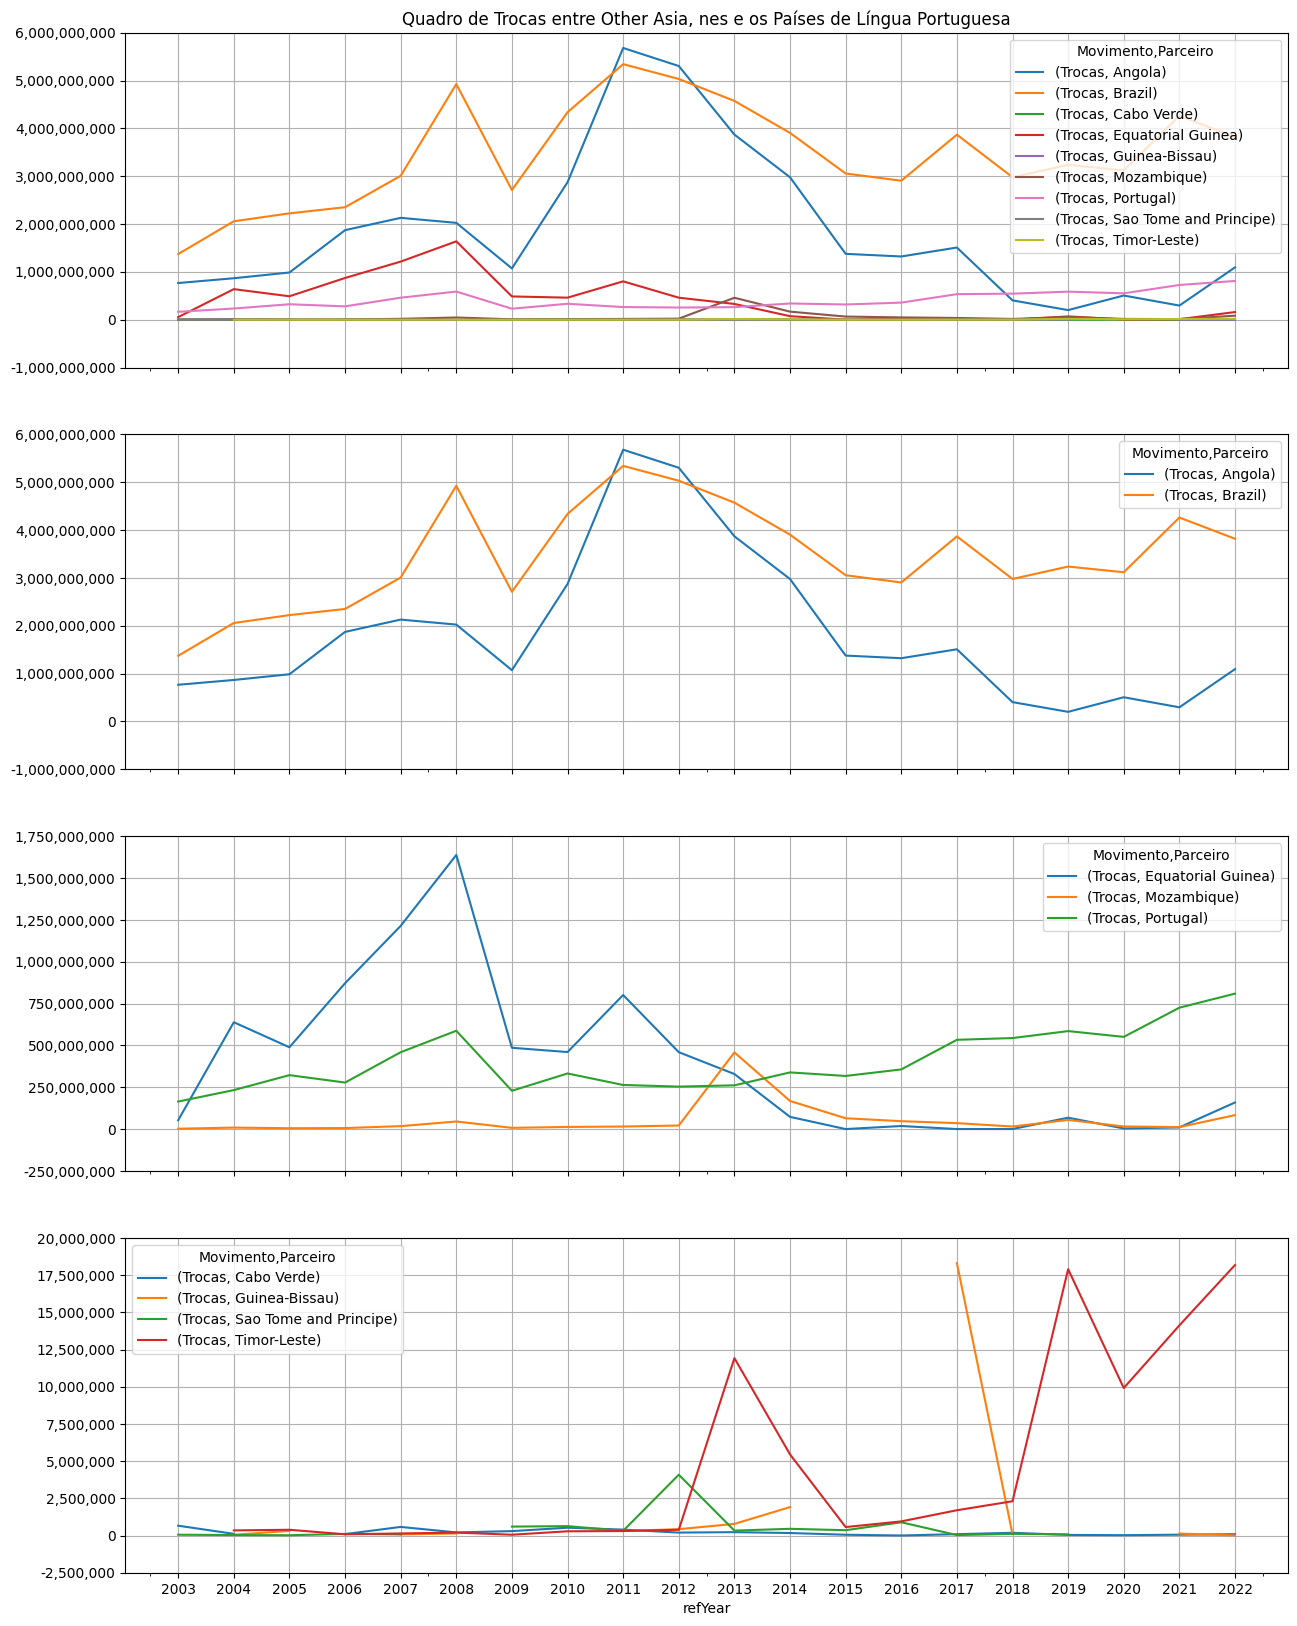

In [54]:
import matplotlib.pyplot as plt

title=f"Quadro de {movimento} entre {comtrade.COUNTRY_CODES[asia_nes]} e os Países de Língua Portuguesa"

# Define the line styles
line_styles = ['-', '--', '-.', ':']

size=(15,20)
figure,axis = plt.subplots(4,sharex=True,figsize=size, squeeze=True)
graph_data.plot.line(ax=axis[0],xticks=graph_data.index.values,title=title)

detalhe_paises = ['Angola','Brazil']
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[1],xticks=graph_data.index.values)

detalhe_paises = ['Equatorial Guinea','Mozambique','Portugal',]
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[2],xticks=graph_data.index.values)

detalhe_paises = ['Cabo Verde','Guinea-Bissau','Sao Tome and Principe','Timor-Leste']
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[3],xticks=graph_data.index.values)

for ax in axis:
    current_values = ax.get_yticks()
    ax.set_yticks(current_values)
    ax.set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
    ax.grid()

plt.savefig(f"reports/tw_plp_{movimento}.png")

### Gráficos importações

In [55]:
pd.options.display.float_format = '{:,.2f}'.format
movimento = 'Importações' # Trocas, Importações, Exportações
graph_data = forum_type.reset_index().pivot(index='refYear',columns=['partnerDesc'], values=[movimento])
graph_data.columns.set_names(['Movimento','Parceiro'], inplace=True)
graph_data

Movimento      Importações                                                \
Parceiro            Angola           Brazil Cabo Verde Equatorial Guinea   
refYear                                                                    
2003        754,817,300.00   916,295,200.00     400.00     53,252,000.00   
2004        864,305,200.00 1,341,059,643.00   1,349.00    638,433,406.00   
2005        983,486,568.00 1,214,202,507.00        NaN    488,952,507.00   
2006      1,866,922,218.00 1,065,873,875.00  18,460.00    870,282,551.00   
2007      2,121,461,485.00 1,343,171,129.00 293,133.00  1,213,949,227.00   
2008      2,012,656,414.00 2,193,436,337.00      32.00  1,637,194,382.00   
2009      1,058,623,864.00 1,305,909,356.00      61.00    485,946,350.00   
2010      2,859,560,967.00 2,433,927,352.00     158.00    460,455,130.00   
2011      5,665,315,729.00 3,003,163,104.00  15,349.00    801,101,803.00   
2012      5,004,958,562.00 3,047,004,997.00  15,467.00    459,300,232.00   
2013      3,855,306,649.00 2,748,525,653.00     941.00    328,824,446.00   
2014      2,955,558,824.00 2,236,073,107.00  94,533.00     72,962,783.00   
2015      1,363,633,941.00 1,892,549,555.00  10,506.00        153,925.00   
2016      1,312,764,415.00 1,949,794,174.00     404.00     18,514,456.00   
2017      1,479,442,599.65 2,601,881,911.24  26,500.20        350,322.52   
2018        370,988,214.94 1,635,246,128.63 139,865.59        469,555.92   
2019        193,528,064.67 2,058,858,252.83  10,582.51     68,173,560.60   
2020        498,675,434.50 2,031,865,500.29     238.08      2,344,677.06   
2021        286,366,020.88 2,630,818,578.57   2,291.66     10,098,275.48   
2022        967,017,840.58 2,428,552,217.86   2,887.44    158,844,351.47   

Movimento                                                                    \
Parceiro  Guinea-Bissau     Mozambique       Portugal Sao Tome and Principe   
refYear                                                                       
2003                NaN     269,500.00  43,103,700.00              2,700.00   
2004          50,930.00   5,433,819.00  78,808,596.00                719.00   
2005         302,872.00   1,309,422.00  60,224,633.00              1,162.00   
2006                NaN   1,144,269.00  50,109,991.00              1,398.00   
2007          49,480.00  12,679,694.00  42,666,052.00              6,272.00   
2008          27,954.00  12,271,046.00  40,728,919.00                   NaN   
2009                NaN   2,592,501.00  43,978,737.00              2,701.00   
2010                NaN   2,079,124.00  51,234,748.00              1,644.00   
2011          62,653.00   2,023,280.00  61,518,179.00            148,942.00   
2012         406,253.00   4,381,320.00  68,610,340.00                473.00   
2013         741,405.00 114,592,167.00  72,897,779.00             40,717.00   
2014       1,425,795.00  66,541,896.00 102,988,742.00             11,532.00   
2015                NaN  49,297,282.00 112,447,746.00             26,100.00   
2016         692,039.00  38,471,197.00  86,284,854.00            161,679.00   
2017          74,766.15  27,638,064.96  90,280,447.31             11,639.03   
2018          86,094.09   5,274,978.45  89,859,207.14             93,851.47   
2019                NaN   6,605,026.30  98,083,455.46             57,605.75   
2020                NaN   5,656,652.02 115,531,490.20              6,530.28   
2021         127,187.18   2,733,557.60 203,800,986.84             10,777.97   
2022             839.37  19,856,819.48 204,886,069.20             15,545.25   

Movimento              
Parceiro  Timor-Leste  
refYear                
2003              NaN  
2004       106,926.00  
2005       288,109.00  
2006        57,878.00  
2007        97,285.00  
2008       148,569.00  
2009           273.00  
2010       250,148.00  
2011       154,545.00  
2012       308,725.00  
2013        28,354.00  
2014        13,613.00  
2015       161,546.00  
2016       244,660.00  
2017       418,019.71  
2

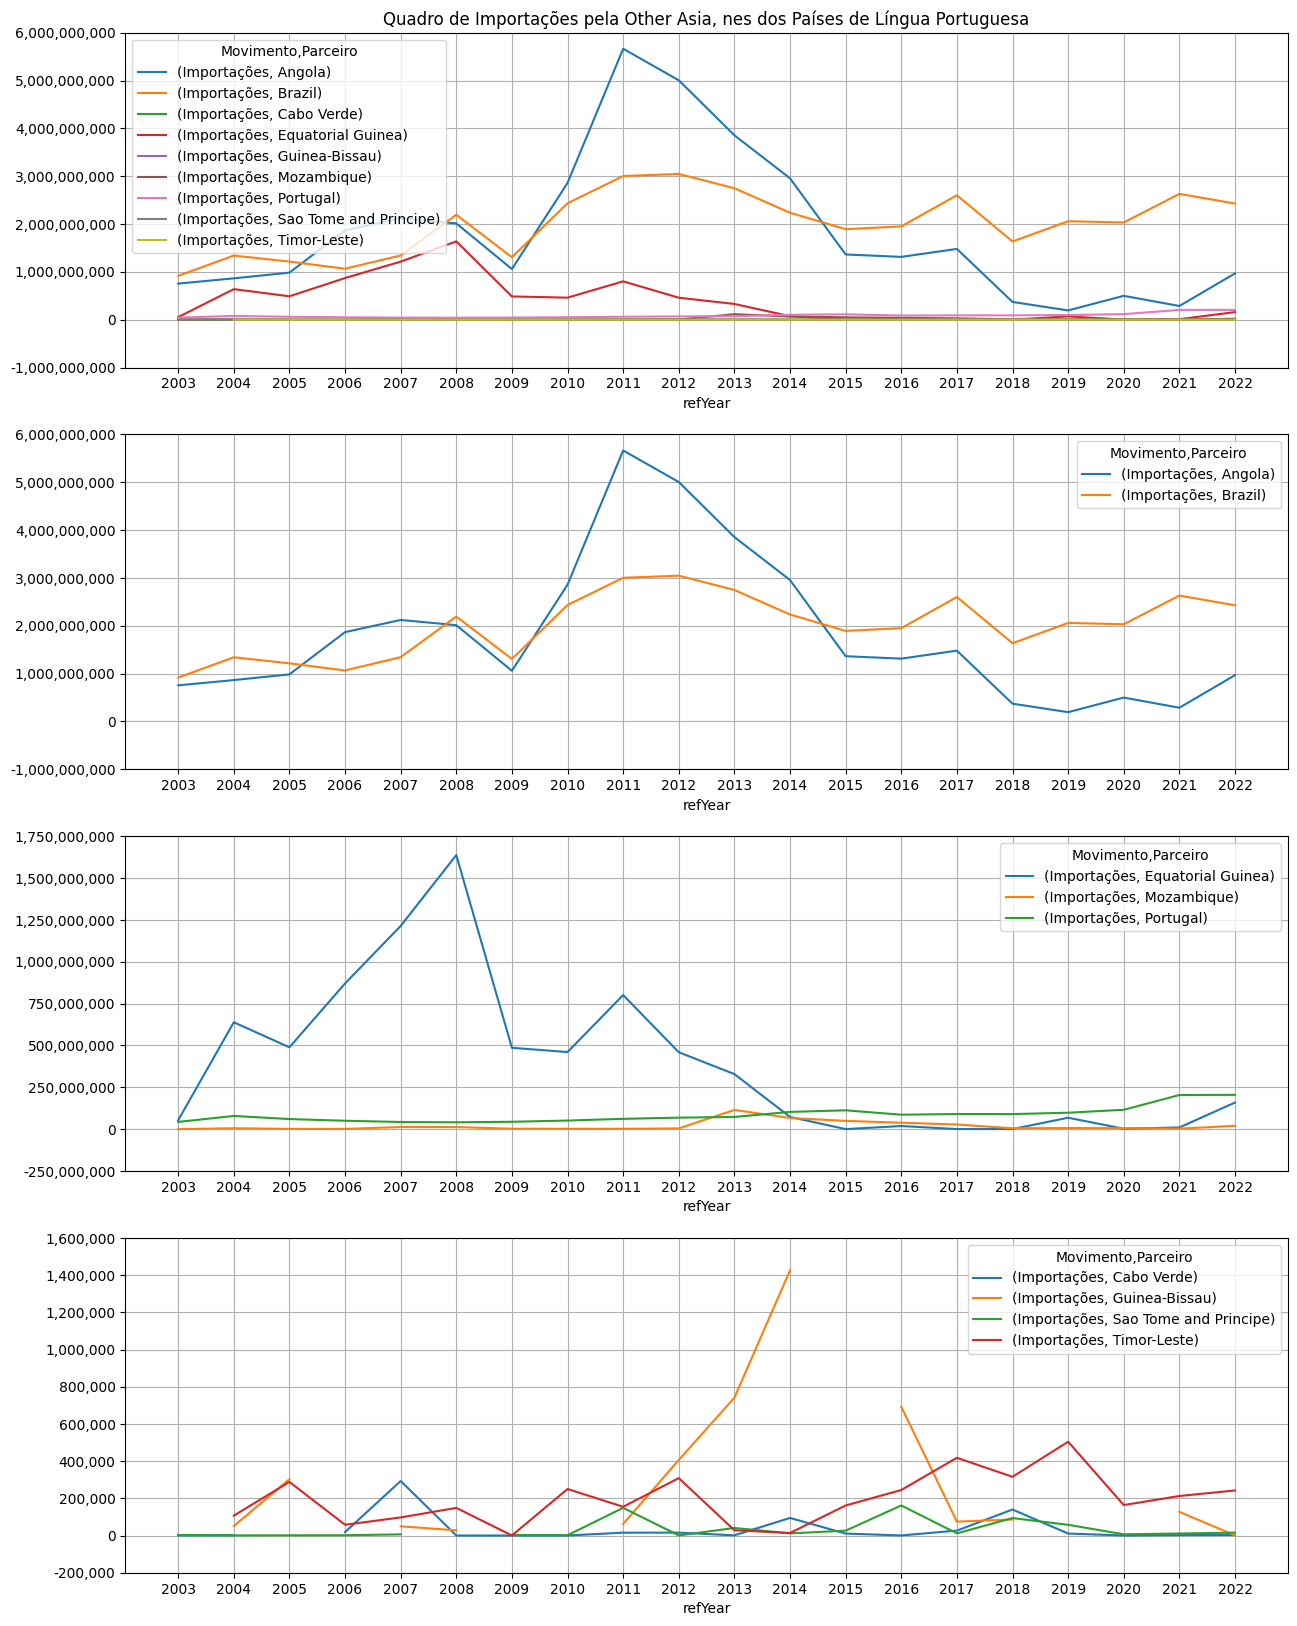

In [56]:
title=f"Quadro de {movimento} pela {comtrade.COUNTRY_CODES[asia_nes]} dos Países de Língua Portuguesa"

size=(15,20)
figure,axis = plt.subplots(4,sharex=False,figsize=size, squeeze=True)
graph_data.plot.line(ax=axis[0],xticks=graph_data.index.values,title=title)

detalhe_paises = ['Angola','Brazil']
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[1],xticks=graph_data.index.values)

detalhe_paises = ['Equatorial Guinea','Mozambique','Portugal',]
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[2],xticks=graph_data.index.values)

detalhe_paises = ['Cabo Verde','Guinea-Bissau','Sao Tome and Principe','Timor-Leste']
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[3],xticks=graph_data.index.values)

for ax in axis:
    current_values = ax.get_yticks()
    ax.set_yticks(current_values)
    ax.set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
    ax.grid()

plt.savefig(f"reports/tw_plp_{movimento}.png")

### Gráficos exportações

In [57]:
pd.options.display.float_format = '{:,.2f}'.format
movimento = 'Exportações' # Trocas, Importações, Exportações
graph_data = forum_type.reset_index().pivot(index='refYear',columns=['partnerDesc'], values=[movimento])
graph_data.columns.set_names(['Movimento','Parceiro'], inplace=True)
graph_data

Movimento    Exportações                                                \
Parceiro          Angola           Brazil Cabo Verde Equatorial Guinea   
refYear                                                                  
2003       11,436,800.00   456,441,700.00 659,700.00        106,700.00   
2004        2,223,073.00   716,646,717.00 110,442.00        119,611.00   
2005        2,796,394.00 1,008,752,338.00 150,713.00        168,859.00   
2006        4,772,779.00 1,285,849,830.00  76,753.00      1,394,536.00   
2007        7,662,065.00 1,664,958,354.00 285,155.00        332,259.00   
2008       11,948,590.00 2,732,951,558.00 208,909.00        773,959.00   
2009       12,790,479.00 1,405,158,710.00 296,121.00         12,891.00   
2010       14,310,665.00 1,904,076,154.00 525,820.00         92,442.00   
2011       15,936,297.00 2,339,585,992.00 381,026.00        196,879.00   
2012      298,894,462.00 1,985,376,295.00 181,962.00        382,739.00   
2013       15,169,505.00 1,825,710,308.00 225,408.00        374,975.00   
2014       21,474,095.00 1,668,792,158.00  73,089.00        373,077.00   
2015       12,873,365.00 1,163,690,019.00  42,171.00        215,008.00   
2016        8,759,819.00   955,428,443.00   1,614.00        151,790.00   
2017       29,040,282.65 1,266,135,429.57  64,462.43        143,659.13   
2018       32,496,888.74 1,343,614,570.97  43,433.89        184,610.77   
2019        6,638,785.01 1,179,102,808.03  31,158.83         82,216.69   
2020        6,731,606.36 1,087,122,127.99  22,462.97      1,690,712.58   
2021        8,672,333.59 1,632,451,238.57  54,248.41        243,276.37   
2022      126,282,048.55 1,390,378,046.23  87,874.41        399,081.13   

Movimento                                                                    \
Parceiro  Guinea-Bissau     Mozambique       Portugal Sao Tome and Principe   
refYear                                                                       
2003          26,200.00   2,263,500.00 121,641,500.00             51,400.00   
2004           2,277.00   3,706,161.00 154,415,328.00             30,831.00   
2005           5,566.00   4,100,894.00 262,308,802.00             17,893.00   
2006         247,945.00   5,290,028.00 228,214,753.00            107,781.00   
2007          23,811.00   5,258,055.00 416,880,456.00             69,028.00   
2008         112,080.00  33,308,806.00 546,962,119.00             67,981.00   
2009          45,223.00   5,140,826.00 185,213,763.00            597,459.00   
2010          14,069.00  11,022,805.00 281,260,727.00            628,821.00   
2011         238,265.00  13,540,682.00 202,267,199.00            168,496.00   
2012          20,503.00  17,223,470.00 185,459,899.00          4,086,327.00   
2013          40,809.00 343,734,169.00 188,815,723.00            289,125.00   
2014         485,288.00 101,644,263.00 235,861,990.00            439,492.00   
2015          17,021.00  15,630,041.00 205,260,157.00            331,349.00   
2016                NaN   9,030,805.00 270,441,159.00            728,063.00   
2017      18,232,293.20   8,147,135.19 443,393,579.90             18,845.38   
2018           1,690.93  10,376,801.58 454,192,375.50             17,174.64   
2019           1,358.95  48,273,313.50 487,640,805.15             18,184.10   
2020           4,458.56  10,285,962.31 435,598,944.09                   NaN   
2021           5,299.52   9,482,514.81 521,753,481.95                   NaN   
2022           4,570.13  63,831,653.32 604,520,303.62             20,095.19   

Movimento                
Parceiro    Timor-Leste  
refYear                  
2003                NaN  
2004         236,315.00  
2005          99,085.00  
2006          24,594.00  
2007          41,380.00  
2008          48,653.00  
2009          53,716.00  
2010          33,796.00  
2011         147,311.00  
2012          77,014.00  
2013      11,894,013.00  
2014       5,437,325.00  
2015         407,364.00  
2016         705,372.00  
2017       1,280,994.00  
2018       

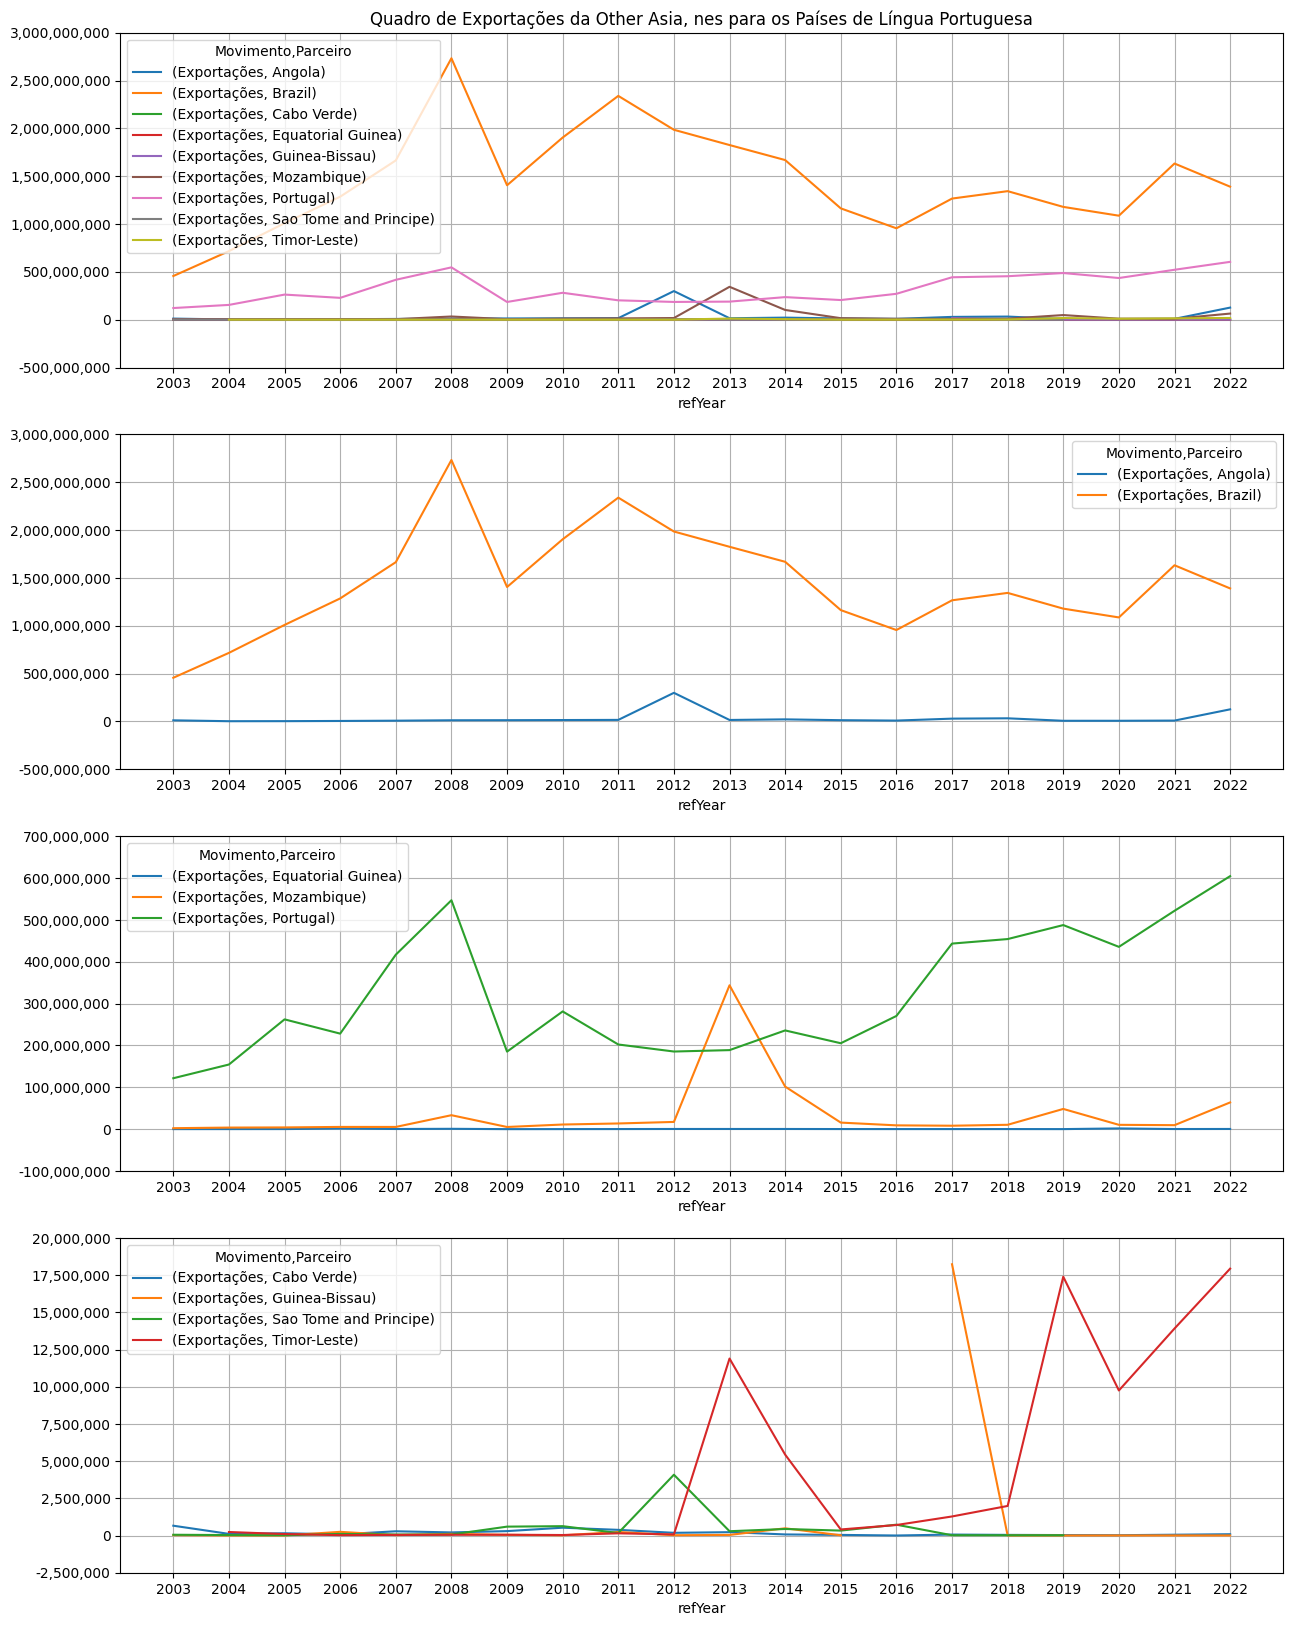

In [58]:
title=f"Quadro de {movimento} da {comtrade.COUNTRY_CODES[asia_nes]} para os Países de Língua Portuguesa"

size=(15,20)
figure,axis = plt.subplots(4,sharex=False,figsize=size, squeeze=True)
graph_data.plot.line(ax=axis[0],xticks=graph_data.index.values,title=title)

detalhe_paises = ['Angola','Brazil']
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[1],xticks=graph_data.index.values)

detalhe_paises = ['Equatorial Guinea','Mozambique','Portugal',]
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[2],xticks=graph_data.index.values)

detalhe_paises = ['Cabo Verde','Guinea-Bissau','Sao Tome and Principe','Timor-Leste']
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[3],xticks=graph_data.index.values)

for ax in axis:
    current_values = ax.get_yticks()
    ax.set_yticks(current_values)
    ax.set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
    ax.grid()

plt.savefig(f"reports/tw_plp_{movimento}.png")

### Gráficos saldo (Asia nes: exportações-importações)

In [60]:
pd.options.display.float_format = '{:,.2f}'.format
movimento = 'Saldo' # Trocas, Importações, Exportações
graph_data = forum_type.reset_index().pivot(index='refYear',columns=['partnerDesc'], values=[movimento])
graph_data.columns.set_names(['Movimento','Parceiro'], inplace=True)
graph_data

Movimento             Saldo                                                 \
Parceiro             Angola            Brazil Cabo Verde Equatorial Guinea   
refYear                                                                      
2003        -743,380,500.00   -459,853,500.00 659,300.00    -53,145,300.00   
2004        -862,082,127.00   -624,412,926.00 109,093.00   -638,313,795.00   
2005        -980,690,174.00   -205,450,169.00        NaN   -488,783,648.00   
2006      -1,862,149,439.00    219,975,955.00  58,293.00   -868,888,015.00   
2007      -2,113,799,420.00    321,787,225.00  -7,978.00 -1,213,616,968.00   
2008      -2,000,707,824.00    539,515,221.00 208,877.00 -1,636,420,423.00   
2009      -1,045,833,385.00     99,249,354.00 296,060.00   -485,933,459.00   
2010      -2,845,250,302.00   -529,851,198.00 525,662.00   -460,362,688.00   
2011      -5,649,379,432.00   -663,577,112.00 365,677.00   -800,904,924.00   
2012      -4,706,064,100.00 -1,061,628,702.00 166,495.00   -458,917,493.00   
2013      -3,840,137,144.00   -922,815,345.00 224,467.00   -328,449,471.00   
2014      -2,934,084,729.00   -567,280,949.00 -21,444.00    -72,589,706.00   
2015      -1,350,760,576.00   -728,859,536.00  31,665.00         61,083.00   
2016      -1,304,004,596.00   -994,365,731.00   1,210.00    -18,362,666.00   
2017      -1,450,402,317.00 -1,335,746,481.67  37,962.23       -206,663.39   
2018        -338,491,326.20   -291,631,557.66 -96,431.70       -284,945.15   
2019        -186,889,279.66   -879,755,444.80  20,576.32    -68,091,343.91   
2020        -491,943,828.14   -944,743,372.30  22,224.88       -653,964.48   
2021        -277,693,687.29   -998,367,340.00  51,956.75     -9,854,999.11   
2022        -840,735,792.03 -1,038,174,171.63  84,986.97   -158,445,270.34   

Movimento                                                                    \
Parceiro  Guinea-Bissau     Mozambique       Portugal Sao Tome and Principe   
refYear                                                                       
2003                NaN   1,994,000.00  78,537,800.00             48,700.00   
2004         -48,653.00  -1,727,658.00  75,606,732.00             30,112.00   
2005        -297,306.00   2,791,472.00 202,084,169.00             16,731.00   
2006                NaN   4,145,759.00 178,104,762.00            106,383.00   
2007         -25,669.00  -7,421,639.00 374,214,404.00             62,756.00   
2008          84,126.00  21,037,760.00 506,233,200.00                   NaN   
2009                NaN   2,548,325.00 141,235,026.00            594,758.00   
2010                NaN   8,943,681.00 230,025,979.00            627,177.00   
2011         175,612.00  11,517,402.00 140,749,020.00             19,554.00   
2012        -385,750.00  12,842,150.00 116,849,559.00          4,085,854.00   
2013        -700,596.00 229,142,002.00 115,917,944.00            248,408.00   
2014        -940,507.00  35,102,367.00 132,873,248.00            427,960.00   
2015                NaN -33,667,241.00  92,812,411.00            305,249.00   
2016                NaN -29,440,392.00 184,156,305.00            566,384.00   
2017      18,157,527.05 -19,490,929.77 353,113,132.59              7,206.35   
2018         -84,403.16   5,101,823.13 364,333,168.36            -76,676.83   
2019                NaN  41,668,287.20 389,557,349.69            -39,421.65   
2020                NaN   4,629,310.30 320,067,453.89                   NaN   
2021        -121,887.67   6,748,957.20 317,952,495.12                   NaN   
2022           3,730.76  43,974,833.84 399,634,234.42              4,549.94   

Movimento                
Parceiro    Timor-Leste  
refYear                  
2003                NaN  
2004         129,389.00  
2005        -189,024.00  
2006         -33,284.00  
2007         -55,905.00  
2008         -99,916.00  
2009          53,443.00  
2010        -216,352.00  
2011          -7,234.00  
2012        -231,711.00  
2013      11,865,659.00  
2014       5,423,712.00

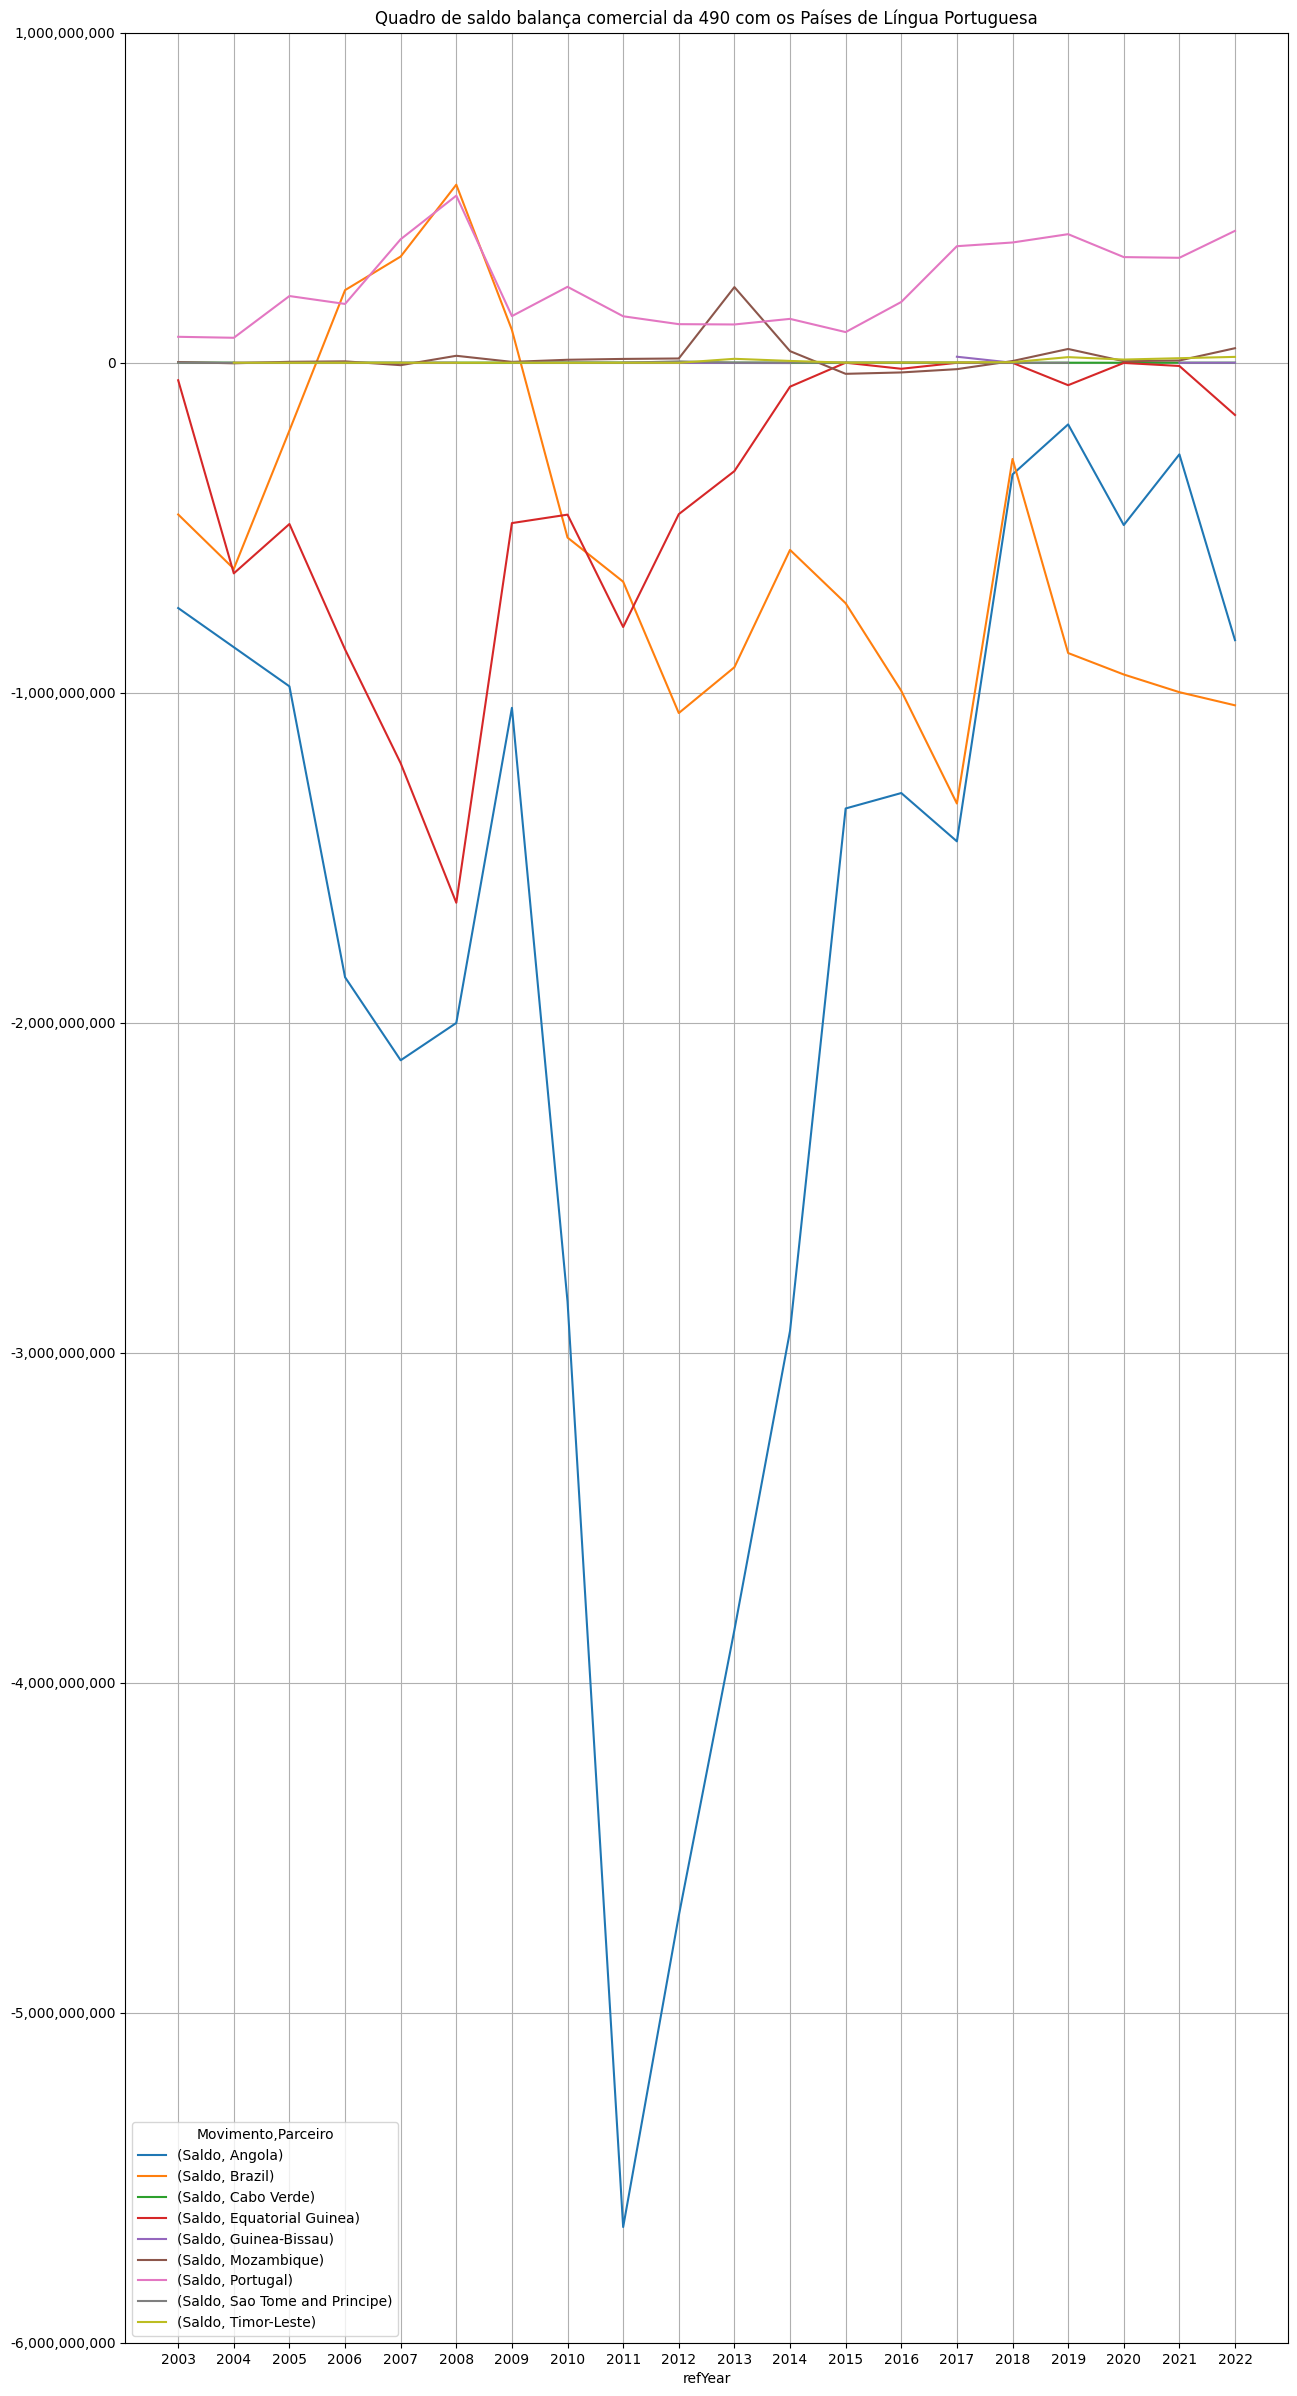

In [61]:
import matplotlib.pyplot as plt

title=f"Quadro de saldo balança comercial da {asia_nes} com os Países de Língua Portuguesa"
ax = graph_data.plot.line(figsize=(15,30),xticks=graph_data.index.values,title=title)

current_values = ax.get_yticks()
ax.set_yticks(current_values)
ax.set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
ax.grid()
plt.savefig(f"reports/tw_plp_{movimento}.png")

In [62]:
import datetime
# print the current date and time


print("Current date and time: ", datetime.datetime.now())

Current date and time:  2023-12-04 08:21:39.470795
